## This notebook experiments with the python package "timeseries-generator"

In [18]:
#from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor
#import pandas as pd
#%matplotlib inline


import pandas as pd
from pandas._libs.tslibs.timestamps import Timestamp
from timeseries_generator.external_factors import CountryGdpFactor, EUIndustryProductFactor
from timeseries_generator import Generator, HolidayFactor, LinearTrend, RandomFeatureFactor, SinusoidalFactor, WeekdayFactor, WhiteNoise


# Setting up parameters

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='date'>)

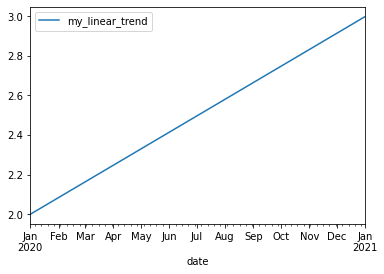

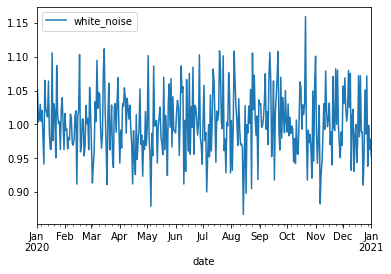

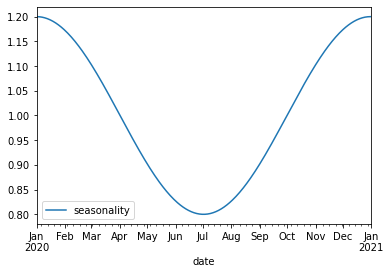

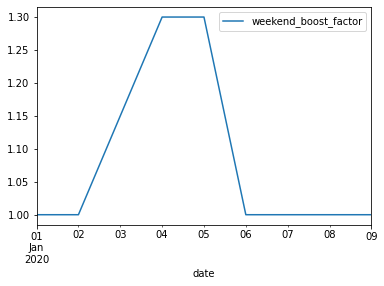

In [38]:
# The python package "timeseries_generator" implements day-increment granularity.
# The columns will have to be manually
start_date = Timestamp("01-01-2020")
end_date = Timestamp("01-01-2021")

features_dict = {
        "station": ["station_1", "station_2"],
        "product_amount": ["bikes"]
}


linear_trend = LinearTrend(coef=1.0, offset=1., col_name="my_linear_trend")
white_noise = WhiteNoise(stdev_factor=0.05)

seasonality = SinusoidalFactor(
    feature="product_amount",
    col_name="product_seasonal_trend_factor",
    feature_values={
        "seasonality": {
            "wavelength": 365.,
            "amplitude": 0.2,
            "phase": 365/4,
            "mean": 1.
        }
    }
)


weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.15, 5: 1.3, 6: 1.3}  # Here we assign a factor of 1.15 to Friday, and 1.3 to Sat/Sun 
)


# Plotting the parameters
linear_trend.plot(start_date=start_date, end_date=end_date)
white_noise.plot(start_date=start_date, end_date=end_date)
seasonality.plot(start_date=start_date, end_date=end_date)
weekday_factor.plot(start_date=start_date, end_date=Timestamp("01-10-2020"))  # Using a smaller timerange here to keep the plot viewable



# Creating generator

In [42]:
g: Generator = Generator(
    factors={
        linear_trend,
        white_noise
    },
    features=features_dict,
    date_range=pd.date_range(start=start_date, end=end_date),
    base_value=10
)
    
df = g.generate()

<AxesSubplot:xlabel='date'>

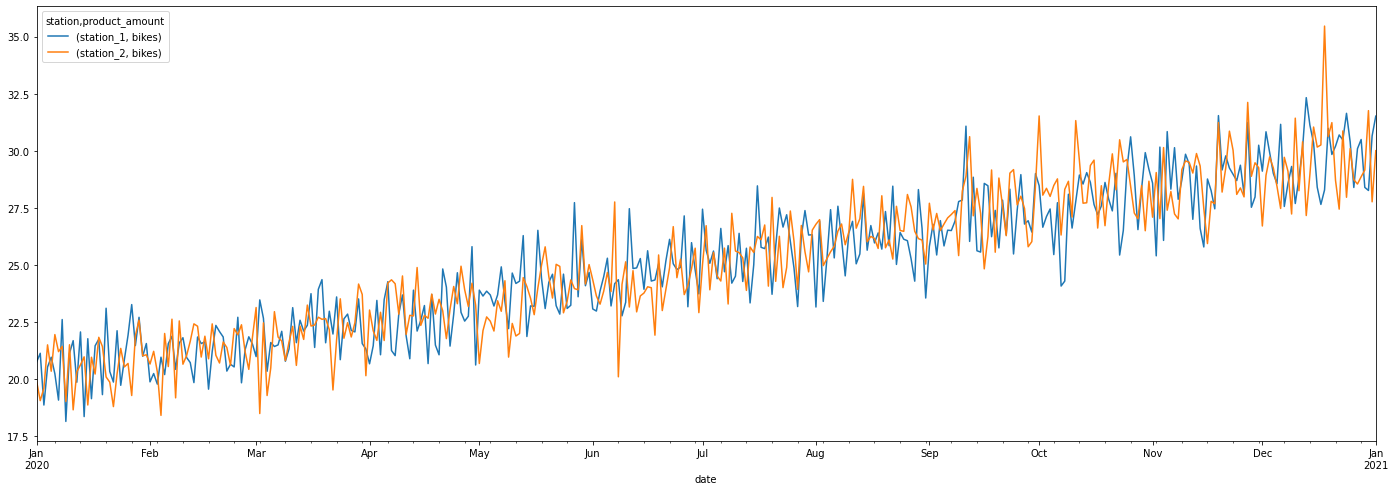

In [43]:

plot_df = df.set_index('date')
plot_df[['station', 'product_amount', 'value']].pivot(columns=['station', 'product_amount'], values='value').plot(figsize=(24,8))